In [0]:
import numpy as np
from PIL import Image
import keras
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [0]:
img_list=[]
s=''
for pics in range(0,4198):
    st=str(pics)
    s='C:/Users/pramo/Downloads/face-to-bmi/Data/Resized_images_RGB_WITHOUTFAULT/img_'+st+'.bmp'
    img_list.append(s)

In [0]:
len(img_list)

4198

In [0]:
img_list[3]

'C:/Users/pramo/Downloads/face-to-bmi/Data/Resized_images_RGB_WITHOUTFAULT/img_3.bmp'

In [0]:
from keras.applications.mobilenet import MobileNet 
from keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image
from keras import optimizers

from keras.applications.mobilenet import preprocess_input

from keras.models import Model

from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [0]:
#for extracting features  from specific layers(avg_pool)

base_model= MobileNet(weights='imagenet')

model=Model(inputs=base_model.input, outputs=base_model.get_layer('global_average_pooling2d_1').output)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [0]:
temp_x=1
for train_num in img_list:
    #images size should be 224*224 because vgg16 is pretrained on those dimensions

    img=image.load_img(train_num,target_size=(224,224))

    x=image.img_to_array(img)

    #inorder to create batch of images we need an additional dimension(size1,size2,channels) to (samples, size1,size2,channels)
    x=np.expand_dims(x,axis=0)

    x=preprocess_input(x)#its a mandatory statement to check if input satisfied dimensions needed

    features=model.predict(x)
    
    if(temp_x==1):
        deep_fea=features
        temp_x=0
    else:
        deep_fea=np.append(deep_fea,features,axis=0)#to add new rows to the X_image data

In [0]:
deep_fea.shape

(4198, 1024)

In [0]:
def export_X_train_mob():
    return deep_fea

In [0]:
df=pd.read_csv('data_without_fault_images.csv')

In [0]:
df.columns

Index(['number', 'bmi', 'gender', 'is_training', 'name'], dtype='object')

In [0]:
df=df.drop(['number','is_training','name'],axis=1)

In [0]:
x_gen=df['gender']

In [0]:
y_train=df.loc[:,['bmi']]

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
number=LabelEncoder()
x_gen=number.fit_transform(x_gen.astype('str'))
x_gen=x_gen.reshape(4198,1)


In [0]:
x_gen.shape

(4198, 1)

In [0]:
X_train=np.append(x_gen,deep_fea,axis=1)
X_train.shape

(4198, 1025)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.5)

In [0]:
y_train.shape

(1049, 1)

In [0]:
from sklearn.linear_model import Ridge

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [0]:
#linear,rbf,poly shape of hyperplane that separates
Ridge_re=Ridge(fit_intercept=True, alpha=1, random_state=4, normalize=True)
Ridge_re=Ridge_re.fit(X_train,y_train)

In [0]:
#alp=[0.1,0.01,0.001,0.0001,0]#fitting the decision boundary line perfectly to the data points, higher values results ovefitting

#params={'alpha':alp}

#grid_ridge=GridSearchCV(Ridge_re,param_grid=params)

#model_grid=grid_ridge.fit(X_train,y_train)
#print(model_grid.best_params_)

In [0]:
prediction=Ridge_re.predict(X_test)

In [0]:
from sklearn.utils import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
MSE=mean_squared_error(y_test,prediction)
score=Ridge_re.score(X_test,y_test)
MAE=mean_absolute_error(y_test,prediction)
MAPE=mean_absolute_percentage_error(y_test,prediction)
print("MSE={} and r2score={}, MAE={}, MAPE={}".format(MSE,score,MAE,MAPE))

MSE=54.74072974284729 and r2score=0.21147017194033957, MAE=5.568606395957305, MAPE=17.522644280107798


In [0]:
from matplotlib import pyplot

Text(0,0.5,'predicted')

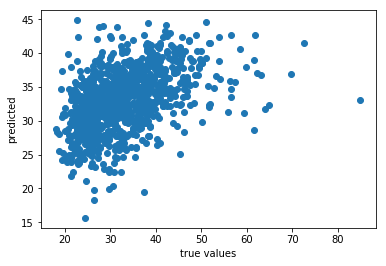

In [0]:
pyplot.scatter(y_test,prediction)
pyplot.xlabel('true values')
pyplot.ylabel('predicted')

In [0]:
#pramod image test
pramod=['C:/Users/pramo/Downloads/face-to-bmi/Data/Resized_images_RGB_WITHOUTFAULT/img_86.bmp']

temp_x=1
for train_num in pramod:
    #images size should be 224*224 because vgg16 is pretrained on those dimensions

    img=image.load_img(train_num,target_size=(224,224))

    x=image.img_to_array(img)

    #inorder to create batch of images we need an additional dimension(size1,size2,channels) to (samples, size1,size2,channels)
    x=np.expand_dims(x,axis=0)

    x=preprocess_input(x)#its a mandatory statement to check if input satisfied dimensions needed

    features=model.predict(x)
    
    if(temp_x==1):
        pra_fea=features
        temp_x=0
    else:
        pra_fea=np.append(pra_fea,features,axis=0)#to add new rows to the X_image data


pra_fea.shape

pra_gen=np.array([1])
pra_gen=pra_gen.reshape(1,1)

pra_fea=np.append(pra_gen,pra_fea,axis=1)
pra_fea.shape

(1, 1025)

In [0]:
Ridge_re.predict(pra_fea)

array([[36.10605037]])

In [0]:
from sklearn.svm import SVR

In [0]:
"""#gridsearchcv for SVR
gammas=[0.001,0.01,0.1,1,10]#higher gamma considers points near decision boundary
c=[0.1,1,10,100,1000]#fitting the decision boundary line perfectly to the data points, higher values results ovefitting
#linear,rbf,poly shape of hyperplane that separates
param_grid={'C':c,'gamma':gammas}
regression=SVR(kernel='rbf')
grid_search=GridSearchCV(regression,param_grid)
model_svr=grid_search.fit(X_train,y_train)
    #prediction=model.predict(X_test)
print(model_svr.best_params_)
   # MSE=mean_squared_error(y_test,prediction)
    #score=r2_score(y_test,prediction)
    #print("C:{},mean error{},r2score{}".format(g,MSE,score))"""

In [0]:
regression=SVR(C=10,gamma=0.001)

In [0]:
model_svr=regression.fit(X_train,y_train)

C:\Users\pramo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
prediction_svr=model_svr.predict(X_test)

In [0]:
MSE=mean_squared_error(y_test,prediction_svr)
score=model_svr.score(X_test,y_test)
MAE=mean_absolute_error(y_test,prediction_svr)
MAPE=mean_absolute_percentage_error(y_test,prediction_svr)
print("MSE={} and r2score={}, MAE={}, MAPE={}".format(MSE,score,MAE,MAPE))

MSE=53.40650532875798 and r2score=0.23068942153341454, MAE=5.3892576165948896, MAPE=21.910577224448122


In [0]:
model_svr.predict(pra_fea)

array([36.18216063])

In [0]:
def export_prediction_mob_SVR():
    return prediction_svr
def export_ytest_mob_SVR():
    return y_test

In [0]:
def export_prediction_mob_ridge():
    return prediction
def export_ytest_mob_SVR():
    return y_test